<img src="https://easy.gems.dkrz.de/_images/landing-page-banner.png"
     width="30%"
     alt="HEALPix logo"
     align="right"
/>

# easy.gems for HEALPix Analysis & Visualization

### In this section, you'll learn:

* Utilizing intake to open a HEALPix data catalog
* Using the `healpix` package to perform HEALPix operations to look at basic statistics
* Plotting HEALPix data via easy.gems functionality

### Related Documentation

* [Getting started with hierarchical HEALPix data - easy.gems Documentation](https://easy.gems.dkrz.de/Processing/healpix/healpix_starter.html#)
* [Plotting with cartopy - easy.gems Documentation](https://easy.gems.dkrz.de/Processing/healpix/healpix_cartopy.html)
* [Intake Cookbook](https://projectpythia.org/intake-cookbook/README.html)

### Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [HEALPix overview](00-healpix) | Necessary  | |

**Time to learn**: 30 minutes

-----

## Open data catalog

:::{note}

If you think that you first need to learn about Intake, Pythia's [Intake Cookbook](https://projectpythia.org/intake-cookbook/README.html) is a great resource to do so.

:::

Let us use the online data catalog from the WCRP's Digital Earths Global Hackathon 2025's [catalog repository](https://github.com/digital-earths-global-hackathon/catalog) using `intake` and read the output of the `ICON` simulation run `ngc4008`, which is stored in the HEALPix format:

In [1]:
import intake

# Hackathon data catalogs
cat_url = "https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml"
cat = intake.open_catalog(cat_url).online
model_run = cat.icon_ngc4008

:::{note}

We highly recommend checking out the [easy.gems documentation on HEALPix data catalogs](https://easy.gems.dkrz.de/Processing/healpix/healpix_starter.html#the-catalog) to understand the `zoom` and `time` parametrization of the model runs in the catalogs. In short, each model run has an independent `Dataset` for each combination of the `zoom` and `time` parameters as depicted below (image credit [easy.gems documentation on HEALPix data catalogs](https://easy.gems.dkrz.de/Processing/healpix/healpix_starterhtml#the-catalog), and "PT30M" in this figure should be "PT15M", 15 minutes, for the hackathon data we are using here)

:::

<img src="https://easy.gems.dkrz.de/_images/ds_hierarchy.png"
     width=600
     alt="Matplotlib Logo"
/>

## Explore datasets

So, the coarsest dataset in this model run would be as follows (Even if we called it without specifying any parameters, i.e. `model_run.to_dask()`, the result would be same as the `ds_coarsest` below since this model run defaults to the coarsest settings):

In [2]:
ds_coarsest = model_run(zoom=0, time="P1D").to_dask()
ds_coarsest

/work/mh0033/m300883/conda/envs/easy/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 883MB
Dimensions:                              (time: 10958, depth_half: 73,
                                          cell: 12, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
Dimensions without coordinates: cell
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, cell) float32 38MB ...
    FrshFlux_IceSalt                     (time, cell) float32 526kB ...
    FrshFlux_TotalIce                    (time, cell) float32 526kB ...
    Qbot                                 (time, cell) float32 526kB ...
    Qtop                                 (time, cell) float32 526kB ...
    Wind_Speed_10m                       (time, cell) float32 526kB ...
    ...                                   ...
    vas                                  (time, cell) float32 526kB ...
    w                                    (time, depth_half, cell) float32 38MB ...
    wa_phy                               (time, level_half, cell) float32 48MB ...
    zg                                   (level_full, cell) float32 4kB ...
    zghalf                               (level_half, cell) float32 4kB ...
    zos                                  (time, cell) float32 526kB ...

Now, let us look at a dataset with finer zoom level still with the coarsest time and another dataset with a finer zoom level and the finest time (which may be useful for daily analyses) dataset:

In [3]:
ds_fine = model_run(zoom=7).to_dask()
ds_fine

/work/mh0033/m300883/conda/envs/easy/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 14TB
Dimensions:                              (time: 10958, depth_half: 73,
                                          cell: 196608, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
Dimensions without coordinates: cell
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, cell) float32 629GB ...
    FrshFlux_IceSalt                     (time, cell) float32 9GB ...
    FrshFlux_TotalIce                    (time, cell) float32 9GB ...
    Qbot                                 (time, cell) float32 9GB ...
    Qtop                                 (time, cell) float32 9GB ...
    Wind_Speed_10m                       (time, cell) float32 9GB ...
    ...                                   ...
    vas                                  (time, cell) float32 9GB ...
    w                                    (time, depth_half, cell) float32 629GB ...
    wa_phy                               (time, level_half, cell) float32 784GB ...
    zg                                   (level_full, cell) float32 71MB ...
    zghalf                               (level_half, cell) float32 72MB ...
    zos                                  (time, cell) float32 9GB ...

In [4]:
ds_finesttime = model_run(zoom=6, time="PT15M").to_dask()
ds_finesttime

/work/mh0033/m300883/conda/envs/easy/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 1TB
Dimensions:  (crs: 1, time: 1051968, cell: 49152)
Coordinates:
  * crs      (crs) float32 4B nan
  * time     (time) datetime64[ns] 8MB 2020-01-01T00:15:00 ... 2050-01-01
Dimensions without coordinates: cell
Data variables:
    pr       (time, cell) float32 207GB ...
    qv2m     (time, cell) float32 207GB ...
    rlut     (time, cell) float32 207GB ...
    rsds     (time, cell) float32 207GB ...
    sfcwind  (time, cell) float32 207GB ...
    tas      (time, cell) float32 207GB ...

## HEALPix basic stats with the`healpix` package

Let us look at the global and Boulder, CO, USA temperature averages for a 3-year time-slice of the whole dataset. 

For this, we will first need to define a few HEALPix helper functions to get the `nest` and `nside` values from the dataset, then find the HEALPix pixel that Boulder coords fall in, and finally plot those temporal averages using `matplotlib`.

In [5]:
import healpix as hp
import matplotlib.pylab as plt

### HEALPix helper functions

In [6]:
def get_nest(ds):
    return ds.crs.healpix_order == "nest"
    
def get_nside(ds):
    return ds.crs.healpix_nside

### HEALPix pixel containing Boulder's coords

In [9]:
get_nside(ds_fine)

128

In [11]:
%%time
boulder_lon = -105.2747
boulder_lat = 40.0190

boulder_pixel = hp.ang2pix(
    get_nside(ds_fine), boulder_lon, boulder_lat, lonlat=True, nest=get_nest(ds_fine)
)

CPU times: user 217 μs, sys: 0 ns, total: 217 μs
Wall time: 226 μs


### Global and Boulder's temperature averages

CPU times: user 273 ms, sys: 153 ms, total: 426 ms
Wall time: 781 ms


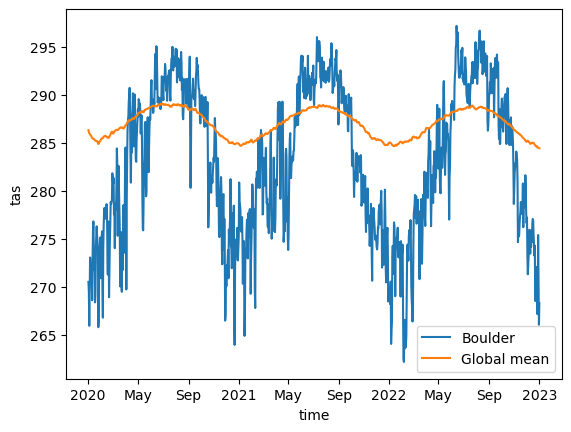

In [13]:
%%time
time_slice = slice("2020-01-02T00:00:00.000000000", "2023-01-01T00:00:00.000000000")

ds_fine.tas.sel(time=time_slice).isel(cell=boulder_pixel).plot(label="Boulder")

ds_coarsest.tas.sel(time=time_slice).mean("cell").plot(label="Global mean")

plt.legend()

## Plotting with easy.gems and cartopy

 In this part, we will look at the ` healpix_show` function that is provided by `easy.gems` for convenient HEALPix plotting.

In [16]:
import easygems.healpix as eghp

import cartopy.crs as ccrs
import cartopy.feature as cf
import cmocean

### Global plots

Most of this is `matplotlib` and `cartopy` code, but have a look at how `eghp.healpix_show()` is called. The following code will plot global temperature (at the first timestep for simplicity)

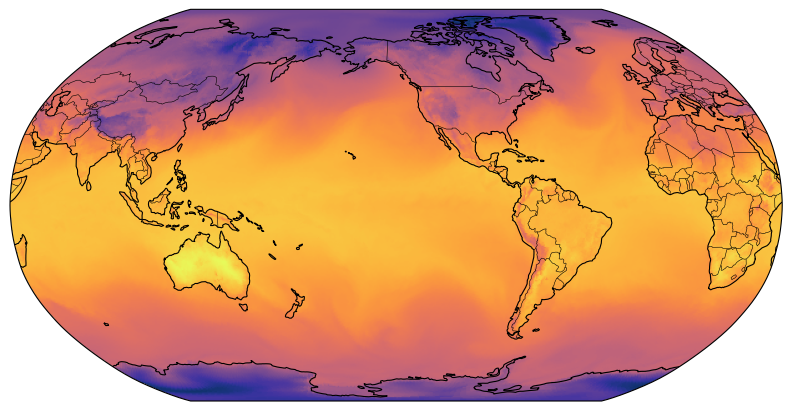

In [17]:
projection = ccrs.Robinson(central_longitude=-135.5808361)

fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)

ax.set_global()

eghp.healpix_show(ds_fine.tas.isel(time=0), ax=ax, cmap=cmocean.cm.thermal)

ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

### Regional plots

If plotting a region of interest is desired, it is also possible through setting extents of the `matplotlib` plot. 

Let us look into USA map using the Boulder, CO, USA coords we had used before for simplicity:

/work/mh0033/m300883/conda/envs/easy/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


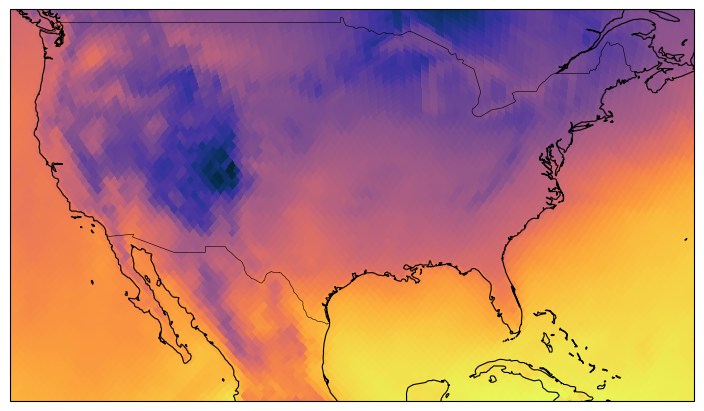

In [18]:
projection = ccrs.Robinson(central_longitude=boulder_lon)

fig, ax = plt.subplots(
    figsize=(8, 4), subplot_kw={"projection": projection}, constrained_layout=True
)
ax.set_extent([boulder_lon-20, boulder_lon+40, boulder_lat-20, boulder_lat+10], crs=ccrs.PlateCarree())

eghp.healpix_show(ds_fine.tas.isel(time=0), ax=ax, cmap=cmocean.cm.thermal)

ax.add_feature(cf.COASTLINE, linewidth=0.8)
ax.add_feature(cf.BORDERS, linewidth=0.4)

## Further `easy.gems` and `healpix`

These are only a sampling of HEALPix and easy.gems capabilities; if you are interested in learning more, be sure to check out the usage examples at the [easy.gems HEALPix Documentation](https://easy.gems.dkrz.de/Processing/healpix/index.html#).

## What is next?

The [next section](02-uxarray) will provide an UXarray workflow that loads in and analyzes & visualizes HEALPix data.